In [1]:
from keras.datasets import imdb

(trainset, trainlabels), (testset, testlabels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()

print(trainset.shape)
print(trainset[0])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [2]:
reverse_index = dict((v,k) for (k,v) in word_index.items())

def translate(list):
    r = " ".join([reverse_index.get(i-3, '?') for i in list])
    return r

In [3]:
print (translate(trainset[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
import numpy as np

def vectorize(sequences, dimention = 10000):
    results = np.zeros((len(sequences), dimention))
    for i, seq in enumerate(sequences):
        results[i,seq] = 1
    return results

In [5]:
x_train = vectorize(trainset)
x_test = vectorize(testset)

y_train = np.asarray(trainlabels).astype('float32')
y_test = np.asarray(testlabels).astype('float32')

In [6]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
hist = network.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data=(x_val, y_val))

h_dict = hist.history
loss = h_dict['loss']
acc = h_dict['accuracy']
val_loss = h_dict['val_loss']
val_accuracy = h_dict['val_accuracy']

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.6942 - loss: 0.6115 - val_accuracy: 0.8628 - val_loss: 0.4129
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8889 - loss: 0.3559 - val_accuracy: 0.8853 - val_loss: 0.3162
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9183 - loss: 0.2515 - val_accuracy: 0.8889 - val_loss: 0.2857
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9342 - loss: 0.1968 - val_accuracy: 0.8758 - val_loss: 0.3066
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9469 - loss: 0.1661 - val_accuracy: 0.8870 - val_loss: 0.2801
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9617 - loss: 0.1352 - val_accuracy: 0.8855 - val_loss: 0.2873
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9663 - loss: 0.1158 - val_accuracy: 0.8757 - val_loss: 0.3276
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9701 - loss: 0.0998 - val_accuracy: 0.8801 - val_los

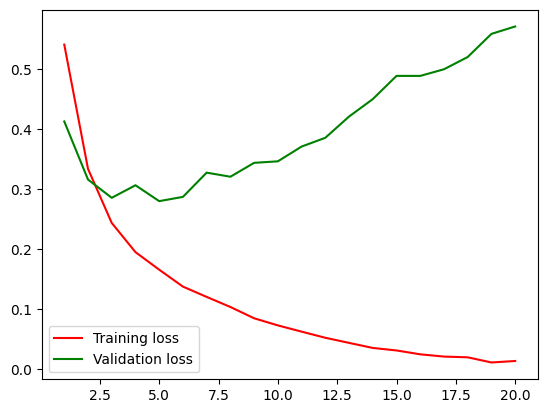

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()